In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib tk

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
os.chdir('/home/maestria/Documentos/FEM/')

In [3]:
from src.mesh import read_msh
from src.quadrature import *
from src.finite_elements import FEM_Equation_Solver,Heat_Equation_Solver

In [4]:
node_coordinates, connection_table,dirichlet_nodes = read_msh('/home/maestria/Documentos/FEM/data/L2.msh')
x1 = 1.0
y1 = 1.0
x_coordinates = node_coordinates[:, 0]
y_coordinates = node_coordinates[:, 1]
not_boundary = (x_coordinates == x1) & (y_coordinates < y1) & (y_coordinates > 0.0)
not_boundary_idx = set(np.array(range(len(not_boundary)))[not_boundary])
dirichlet_nodes= list(set(dirichlet_nodes) - not_boundary_idx)

#fem_solver = FEM_Equation_Solver(node_coordinates, connection_table,dirichlet_nodes)

Mesh name: /home/maestria/Documentos/FEM/data/L2.msh
Mesh version: 4.1
Number of nodes: 1045
Minimum node tag: 1
Maximum node tag: 1045
Number of node entities: 19
Number of elements: 575
Minimum element tag: 1
Maximum element tag: 1709
Number of element entities: 19


In [10]:
def u0(x,y):
    return 0.0

def f_function(t,x,y):
    #return 1.0
    if (x-0.5)**2 +(y-1.5)**2 < 0.25**2:
        return 1.0
    else:
        return 0.0
f_function_vec=np.vectorize(f_function,excluded=[0])
dt=0.01
T_fin=1.0
heat_solver=Heat_Equation_Solver(node_coordinates,connection_table,dirichlet_nodes,u0,dt,T_fin,f_function_vec)

In [9]:
heat_solver.fem_solver.plot_solution(solution[1])

In [11]:
solution=heat_solver.solve()

0.004115226337452122
0.19415218837224638
0.004115226337452122
3699.1594265564004
0.004115226337452122
71439153.76666899
0.004115226337452122
1549669937036.797
0.004115226337452122
3.186446716828539e+16
0.004115226337452122
7.012572698728972e+20
0.004115226337452122
1.4734569440852174e+25
0.004115226337452122
3.2412131773407165e+29
0.004115226337452122
6.88240389958596e+33


KeyboardInterrupt: 

In [35]:
heat_solver.plot_solution(solution)

In [36]:
np.max(solution[-1])

4642424699235543.0

In [16]:
mat,b=fem_solver.assembly_stiffness_matrix_and_load_vector()
Zs=sp.sparse.linalg.spsolve(mat,b)

In [17]:
fem_solver.plot_solution(Zs)

In [19]:
A=mat.toarray()

In [20]:
A[9]

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -1.0000000e+00,  4.0000000e+00, -1.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -1.0000000e+00,  9.0231526e-13,  0.0000000e+00])

In [21]:
b

array([ 0.00000000e+00,  1.44444444e+00,  5.11111111e+00,  1.10000000e+01,
       -8.32334202e-13, -2.88888889e+00, -2.88888889e+00,  1.06666667e+01,
        6.66666667e-01, -2.88888889e+00, -2.88888889e+00,  1.10000000e+01,
        2.00000000e+00,  3.11111111e+00,  6.44444444e+00,  1.20000000e+01])

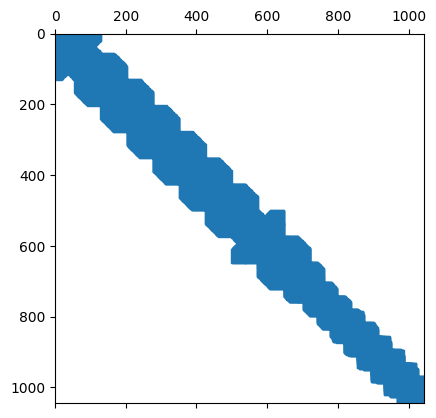

In [8]:
plt.spy(mat)

In [22]:
np.max(b)

0.01188843164156591

In [25]:
sp.sparse.linalg.spsolve(A,b)

/home/maestria/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


array([1.12253231e+13, 1.12253231e+13, 1.12253231e+13, ...,
       1.12253231e+13, 1.12253231e+13, 1.12253231e+13])

In [24]:
np.linalg.solve(A, b)

array([1.10247237e+13, 1.10247237e+13, 1.10247237e+13, ...,
       1.10247237e+13, 1.10247237e+13, 1.10247237e+13])